### 3.1

In [1]:
import csv

file_path = 'datos_join.txt'

with open(file_path, 'r') as file:
    join = file.read()

import ast
import pandas as pd

df1 = pd.DataFrame(ast.literal_eval(join.split('data')[1][5::]))
df2 = pd.DataFrame(ast.literal_eval(join.split('data')[2][5::]))
df3 = pd.DataFrame(ast.literal_eval(join.split('data')[3][5::]))

In [2]:
variab3 = pd.concat([pd.concat([df1, df2], ignore_index=True), df3['test_id']], axis=1)
id = variab3.id
nombres = variab3.primer_nombre
apellidos = variab3.apellido
test_id = variab3.test_id

In [3]:
filas2 = pd.concat([df1, df3.test_id], axis=1).dropna()
id_2 = filas2.id
nombres_2 = filas2.primer_nombre
apellidos_2 = filas2.apellido
test_id_2 = filas2.test_id

In [4]:
columnas2 = pd.concat([df1, df2])
id_3 = columnas2.id
nombres_3 = columnas2.primer_nombre
apellidos_3 = columnas2.apellido

### 3.2

In [5]:
dfAlcohol = pd.read_csv('datos_alcohol.txt')
dfAlcohol

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0    Afghanistan                  0                0               0   
1        Albania                 89              132              54   
2        Algeria                 25                0              14   
3        Andorra                245              138             312   
4         Angola                217               57              45   
..           ...                ...              ...             ...   
188    Venezuela                333              100               3   
189      Vietnam                111                2               1   
190        Yemen                  6                0               0   
191       Zambia                 32               19               4   
192     Zimbabwe                 64               18               4   

     litros_totales_de_alcohol_puro continente  
0                               0.0         AS  
1                               4.9         EU  
2                               0.7         AF  
3                              12.4         EU  
4                               5.9         AF  
..                              ...        ...  
188                             7.7         SA  
189                             2.0         AS  
190                             0.1         AS  
191                             2.5         AF  
192                             4.7         AF  

[193 rows x 6 columns]

In [6]:
dfAlcohol[dfAlcohol['porciones_cerveza'] == max(dfAlcohol['porciones_cerveza'])]
#Namibia toma más cerveza

pais  porciones_cerveza  porciones_licor  porciones_vino  \
117  Namibia                376                3               1   

     litros_totales_de_alcohol_puro continente  
117                             6.8         AF

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

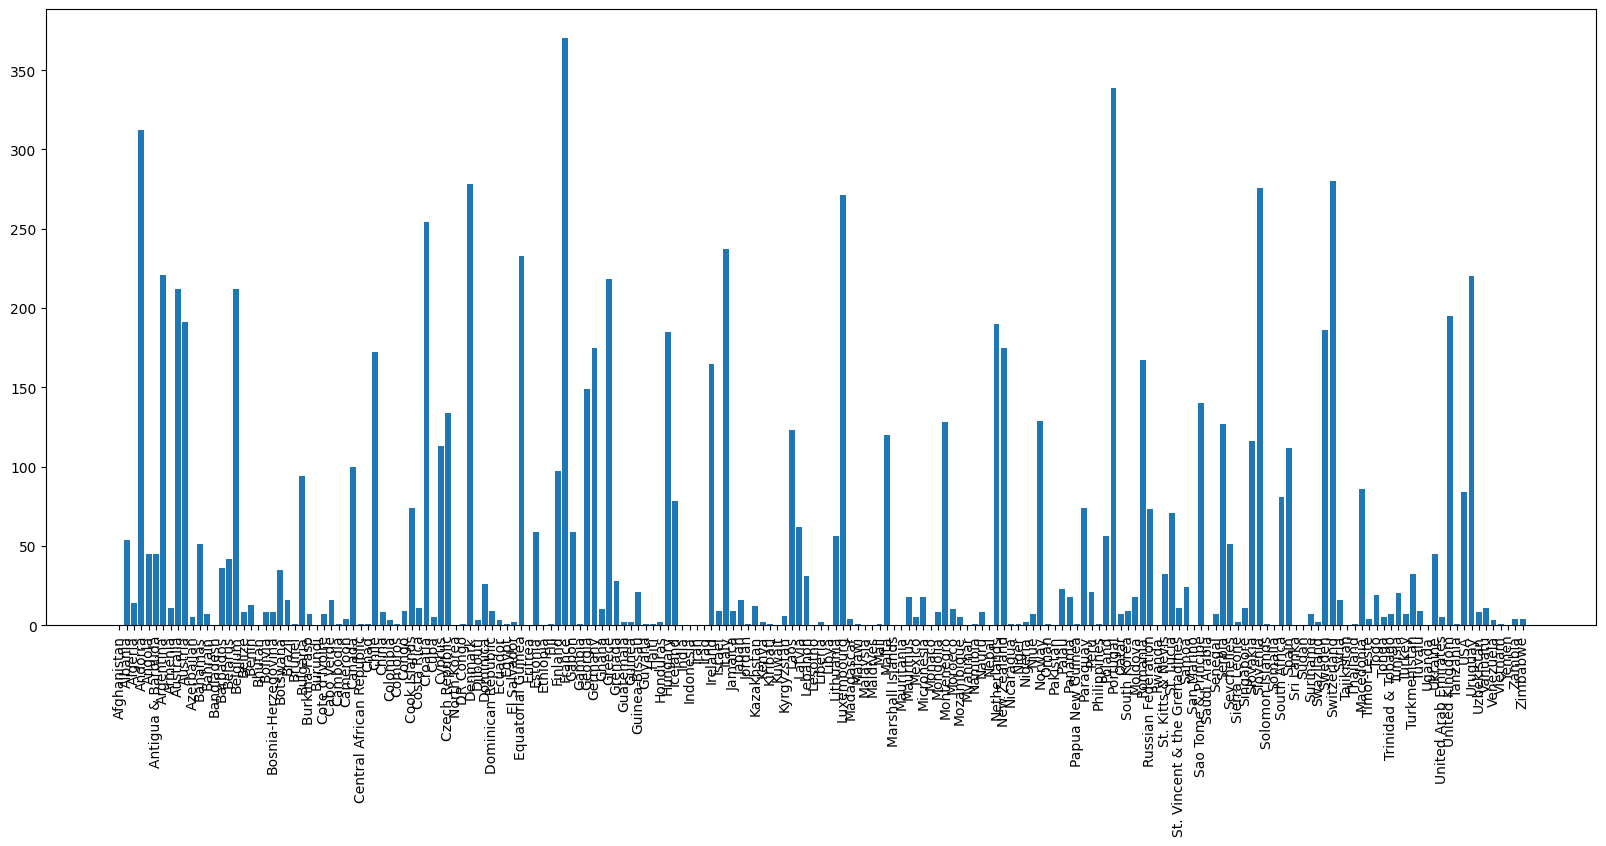

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.bar(dfAlcohol.pais, dfAlcohol.porciones_vino)
plt.xticks( rotation = 90)

<BarContainer object of 5 artists>

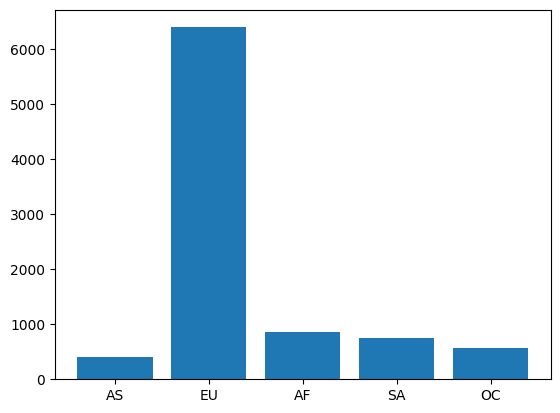

In [8]:
contin = dfAlcohol.continente.dropna().unique()

vino_continentes = []

for i in contin:
    vino_continentes.append(sum(dfAlcohol.porciones_vino[dfAlcohol.continente == i]))

plt.bar(contin, vino_continentes)

#Europa consume mucho más vino que los otros continentes

Text(0.5, 1.0, 'licor')

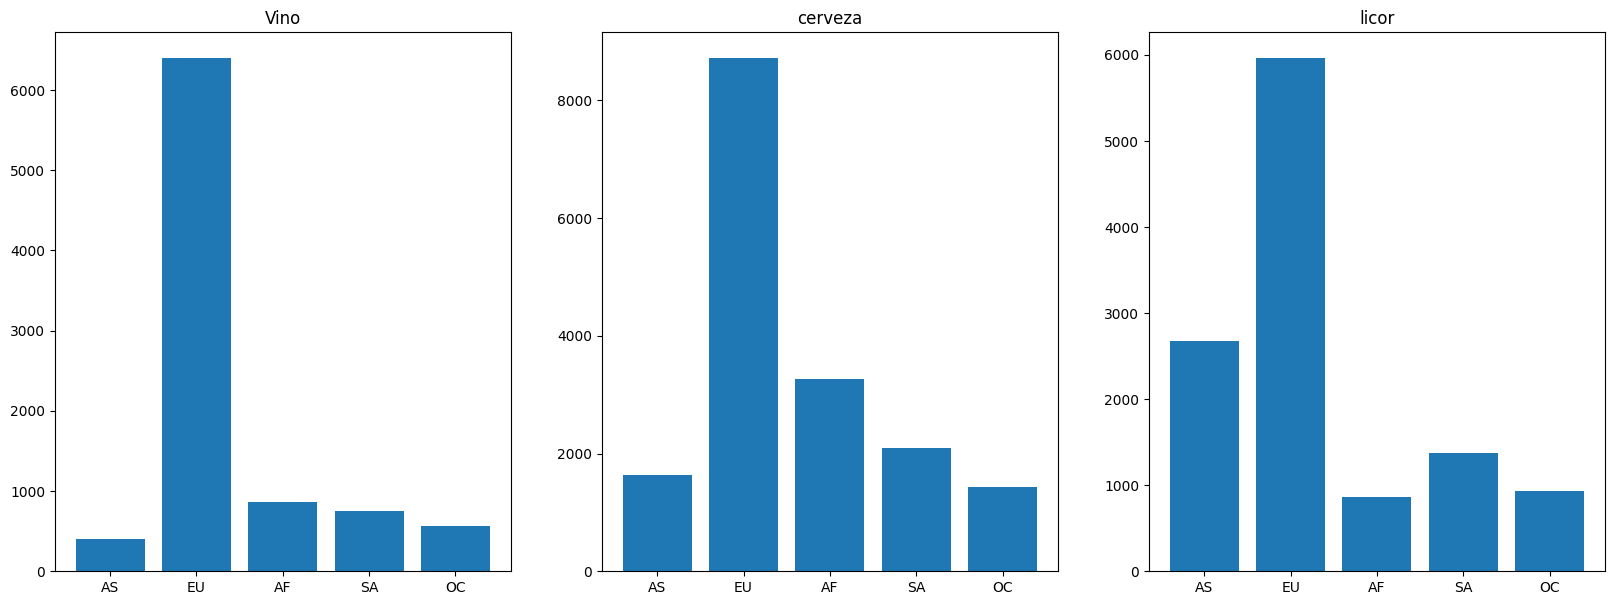

In [9]:
contin = dfAlcohol.continente.dropna().unique()

cerveza_continentes = []

for i in contin:
    cerveza_continentes.append(sum(dfAlcohol.porciones_cerveza[dfAlcohol.continente == i]))

licor_continentes = []

for i in contin:
    licor_continentes.append(sum(dfAlcohol.porciones_licor[dfAlcohol.continente == i]))

plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.bar(contin, vino_continentes)
plt.title('Vino')

plt.subplot(1, 3, 2)
plt.bar(contin, cerveza_continentes)
plt.title('cerveza')

plt.subplot(1, 3, 3)
plt.bar(contin, licor_continentes)
plt.title('licor')

In [10]:
import numpy as np

for i in contin:
    print('medio de consumo de licor de {} = {}'.format(i, np.mean(dfAlcohol.porciones_licor[dfAlcohol.continente == i])))

medio de consumo de licor de AS = 60.84090909090909
medio de consumo de licor de EU = 132.55555555555554
medio de consumo de licor de AF = 16.339622641509433
medio de consumo de licor de SA = 114.75
medio de consumo de licor de OC = 58.4375


In [11]:
for i in contin:
    print('mínimo de consumo de licor de {} = {}'.format(i, min(dfAlcohol.porciones_licor[dfAlcohol.continente == i])))

mínimo de consumo de licor de AS = 0
mínimo de consumo de licor de EU = 0
mínimo de consumo de licor de AF = 0
mínimo de consumo de licor de SA = 25
mínimo de consumo de licor de OC = 0


In [12]:
for i in contin:
    print('maximo de consumo de licor de {} = {}'.format(i, max(dfAlcohol.porciones_licor[dfAlcohol.continente == i])))

maximo de consumo de licor de AS = 326
maximo de consumo de licor de EU = 373
maximo de consumo de licor de AF = 152
maximo de consumo de licor de SA = 302
maximo de consumo de licor de OC = 254


In [13]:
for i in contin:
    print('medio de consumo de licor de {} = {}'.format(i, np.mean(dfAlcohol.porciones_licor[dfAlcohol.continente == i])), '\nmedio de consumo de vino de {} = {}'.format(i, np.mean(dfAlcohol.porciones_vino[dfAlcohol.continente == i])), '\nmedio de consumo de cerveza de {} = {}'.format(i, np.mean(dfAlcohol.porciones_cerveza[dfAlcohol.continente == i])))

medio de consumo de licor de AS = 60.84090909090909 
medio de consumo de vino de AS = 9.068181818181818 
medio de consumo de cerveza de AS = 37.04545454545455
medio de consumo de licor de EU = 132.55555555555554 
medio de consumo de vino de EU = 142.22222222222223 
medio de consumo de cerveza de EU = 193.77777777777777
medio de consumo de licor de AF = 16.339622641509433 
medio de consumo de vino de AF = 16.264150943396228 
medio de consumo de cerveza de AF = 61.471698113207545
medio de consumo de licor de SA = 114.75 
medio de consumo de vino de SA = 62.416666666666664 
medio de consumo de cerveza de SA = 175.08333333333334
medio de consumo de licor de OC = 58.4375 
medio de consumo de vino de OC = 35.625 
medio de consumo de cerveza de OC = 89.6875


### 3.3

In [14]:
visualizacion = pd.read_csv('visualizacion.txt', index_col=0)
visualizacion

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

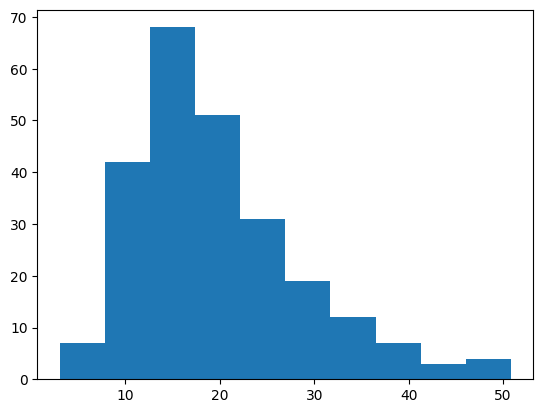

In [15]:
plt.hist(visualizacion.total_bill)

Text(0, 0.5, 'Tip')

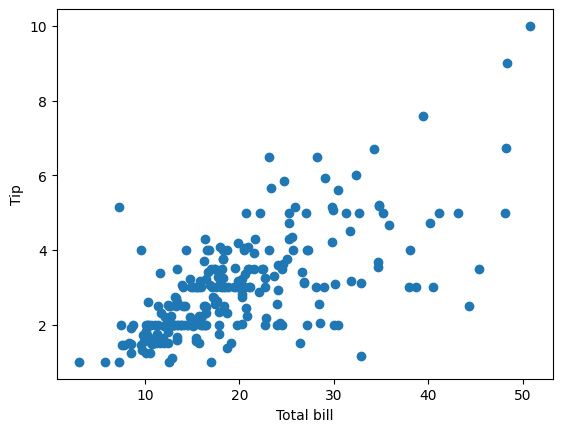

In [16]:
plt.scatter(visualizacion.total_bill, visualizacion.tip)
plt.xlabel('Total bill')
plt.ylabel('Tip')

Text(0, 0.5, 'Mean total bill')

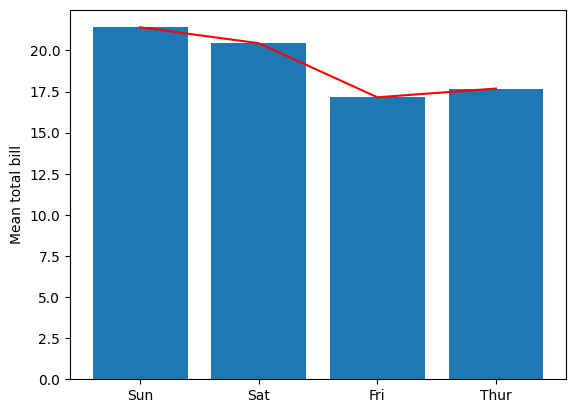

In [58]:
dia = visualizacion.day.unique()
dia[2], dia[3] = dia[3], dia[2]
mean_total_bill = []

for i in dia:
    mean_total_bill.append(np.mean(visualizacion.total_bill[visualizacion.day == i]))

plt.bar(dia, mean_total_bill)
plt.plot(dia, mean_total_bill, 'r')
plt.ylabel('Mean total bill')

Hacia el final de la semana el promedio de propinas aumenta de manera casi lineal (viernes, sabado y domingo).

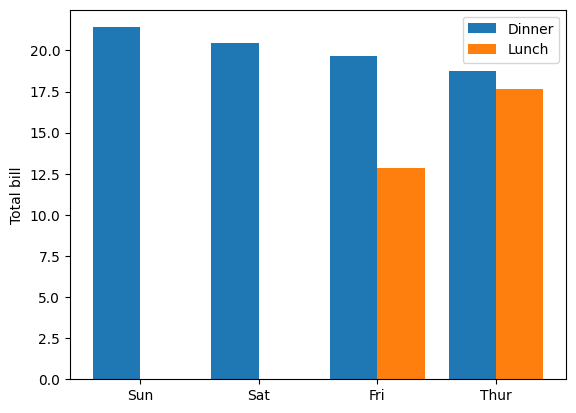

In [60]:
time = visualizacion.time.unique()

mean_total_bill = []
mean_total_bill_ = []

for i in dia:
    mean_total_bill.append(np.mean(visualizacion.total_bill[visualizacion.day == i][visualizacion[visualizacion.day == i].time == time[0]]))
    mean_total_bill_.append(np.mean(visualizacion.total_bill[visualizacion.day == i][visualizacion[visualizacion.day == i].time == time[1]]))


ejeX = np.arange(len(dia))

plt.bar(ejeX - 0.2, mean_total_bill, 0.4, label='Dinner')
plt.bar(ejeX + 0.2, mean_total_bill_, 0.4, label='Lunch')
plt.xticks(ejeX, dia)
plt.ylabel('Total bill')
plt.legend()